> [!Warning] 
> **This project is still in an early phase of development.**
>
> The [python API](../api.html) is not yet stable, and some aspects of the schema for the [blueprint](../terminology.html#term-blueprint) will likely evolve. 
> Therefore whilst you are welcome to try out using the package, we cannot yet guarantee backwards compatibility. 
We expect to reach a more stable version in Q1 2025.
>
> To see which systems C-Star has been tested on so far, see [Supported Systems](../machines.html).

# Restarting & continuing a `ROMSSimulation`

## Contents
1. [Introduction](#1.-Introduction)
2. [Restoring and restarting the Simulation](#2.-Restoring-and-restarting-the-Simulation)
   - [Restoring](#Restoring)
   - [Restarting](#Restarting)
   - [Modifying the time step](#Modifying-the-time-step)
3. [Running the restarted Simulation](#3.-Running-the-restarted-Case)
4. [Some basic analysis of the output](#4.-Some-basic-analysis-of-the-output)



## 1. Introduction

[(return to top)](#Contents)

In this guide we will:

- Take the Simulation we ran for two days (2012-01-01 to 2012-01-03) on the [previous page](../tutorials/2_importing_and_running_a_simulation_from_a_blueprint.html) and create a new Simulation that picks up where it ends (`ROMSSimulation.restart()`)
- Run this second case with a larger time step for the remainder of the month of January 2012
- Produce a basic plot of the output

On the [previous page](../tutorials/2_importing_and_running_a_simulation_from_a_blueprint.html), we began this run from a set of prescribed initial conditions and ran it for two days with a short time step of 1 minute. We should now be able to safely restart the model with a slightly larger time step.
To do this, we can use the `ROMSSimulation.restart()` method, which returns a new `ROMSSimulation` whose start date corresponds to the end date of the Simulation we began with, and whose initial conditions are replaced with a restart file from our previous run. The directory of the restart will be a subdirectory of the original simulation directory.

## 2. Restoring and restarting the Simulation

[(return to top)](#Contents)

### Restoring
First, we restore the previously created simulation using `ROMSSimulation.restore()`. The state of the `ROMSSimulation` is regularly saved to a file in the `directory` so it can be restored exactly in a new python session.

In [1]:
from cstar.roms import ROMSSimulation
original_simulation = ROMSSimulation.restore(directory = "../../examples/roms_marbl_example_case")

### Restarting
Now, we can create a new `ROMSSimulation` that picks up where this `ROMSSimulation` ended using `ROMSSimulation.restart()`. Some points:
- We supply a `new_end_date` (the new *start* date is simply the previous end date)
- The `directory` of the new, restarted `ROMSSimulation` is automatically generated as a subdirectory of the previous `directory`
- The initial conditions of the new simulation are automatically replaced with a restart file generated by ROMS during the previous run

In [2]:
restarted_simulation = original_simulation.restart(new_end_date="2012-01-31 12:00:00")

Taking a look at the simulation, we can see that the initial conditions have been changed:

In [3]:
restarted_simulation.initial_conditions

ROMSInitialConditions(
location = '/Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/output/ROMS_MARBL_rst.20120103120000.nc',
file_hash = None,
start_date = datetime.datetime(2012, 1, 3, 12, 0),
)

### Modifying the time step

If we want to increase the time step for our second run, we will have to manually change the `time_step` entry under `ROMSSimulation.discretization`:

In [4]:
restarted_simulation

ROMSSimulation(
name = roms_marbl_example_cstar_simulation,
directory = /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000,
start_date = 2012-01-03 12:00:00,
end_date = 2012-01-31 12:00:00,
valid_start_date = 2012-01-01 12:00:00,
valid_end_date = 2012-01-31 12:00:00,
discretization = ROMSDiscretization(time_step = 60, n_procs_x = 3, n_procs_y = 3),
codebase = <ROMSExternalCodeBase instance>,
runtime_code = <AdditionalCode instance>,
compile_time_code = <AdditionalCode instance>
model_grid = <ROMSModelGrid instance>,
initial_conditions = <ROMSInitialConditions instance>,
tidal_forcing = <ROMSTidalForcing instance>,
surface_forcing = <list of 2 ROMSSurfaceForcing instances>,
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>
)

In [5]:
restarted_simulation.discretization.time_step = 360

We can now take a look at our `ROMSSimulation` and see everything is as expected:

In [6]:
restarted_simulation

ROMSSimulation(
name = roms_marbl_example_cstar_simulation,
directory = /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000,
start_date = 2012-01-03 12:00:00,
end_date = 2012-01-31 12:00:00,
valid_start_date = 2012-01-01 12:00:00,
valid_end_date = 2012-01-31 12:00:00,
discretization = ROMSDiscretization(time_step = 360, n_procs_x = 3, n_procs_y = 3),
codebase = <ROMSExternalCodeBase instance>,
runtime_code = <AdditionalCode instance>,
compile_time_code = <AdditionalCode instance>
model_grid = <ROMSModelGrid instance>,
initial_conditions = <ROMSInitialConditions instance>,
tidal_forcing = <ROMSTidalForcing instance>,
surface_forcing = <list of 2 ROMSSurfaceForcing instances>,
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>
)

## 3. Running the restarted `Case`

[(return to top)](#Contents)

Now we run through the other steps as normal:

In [7]:
restarted_simulation.setup()
restarted_simulation.build()
restarted_simulation.pre_run()

Configuring ROMSSimulation
--------------------------
Setting up ROMSExternalCodeBase...
ROMSExternalCodeBase correctly configured. Nothing to be done
Setting up MARBLExternalCodeBase...
MARBLExternalCodeBase correctly configured. Nothing to be done

Fetching compile-time code code...
----------------------------------
Cloned repository https://github.com/CWorthy-ocean/cstar_blueprint_roms_marbl_example.git to /var/folders/1s/xjsjyqrj2rdft8014664qczc0000gn/T/tmpgaizl8ns
Checked out main in git repository /var/folders/1s/xjsjyqrj2rdft8014664qczc0000gn/T/tmpgaizl8ns
copying bgc.opt to /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/compile_time_code
copying bulk_frc.opt to /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/compile_time_code
copying cppdefs.opt to /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/compile_time_code
copyin

Cloned repository https://github.com/CWorthy-ocean/cstar_blueprint_roms_marbl_example.git to /var/folders/1s/xjsjyqrj2rdft8014664qczc0000gn/T/tmpf1faluly
Checked out main in git repository /var/folders/1s/xjsjyqrj2rdft8014664qczc0000gn/T/tmpf1faluly
copying roms.in_TEMPLATE to /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/runtime_code
copying template file /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/runtime_code/roms.in_TEMPLATE to editable version /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/runtime_code/roms.in
copying marbl_in to /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/runtime_code
copying marbl_tracer_output_list to /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/runtime_code
copying marbl_diagnostic_outp

Compiling UCLA-ROMS configuration...
UCLA-ROMS compiled at /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/compile_time_code
Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/roms_grd.nc into (3,3)
Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/ROMS_MARBL_rst.20120103120000.nc into (3,3)
Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/roms_tides.nc into (3,3)
Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/roms_bry.nc into (3,3)
Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/roms_bry_bgc.nc into (3,3)


/Users/dafyddstephenson/miniconda3/envs/cstar_env/lib/python3.13/site-packages/roms_tools/tiling/partition.py:322: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(filepath.with_suffix(".nc"))
/Users/dafyddstephenson/miniconda3/envs/cstar_env/lib/python3.13/site-packages/roms_tools/tiling/partition.py:322: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(filepath.with_suffix(".nc"))
/Users/dafyddstephenson/miniconda3/envs/cstar_env/lib/python3.13/site-packages/roms_tools/tiling/partition.py:322: SerializationWarning: Can't decode floating point timedelta to 's' without precision loss, decoding to 'ns' instead. To silence this warning use time_unit=

Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/roms_frc.nc into (3,3)


/Users/dafyddstephenson/miniconda3/envs/cstar_env/lib/python3.13/site-packages/roms_tools/tiling/partition.py:322: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(filepath.with_suffix(".nc"))
/Users/dafyddstephenson/miniconda3/envs/cstar_env/lib/python3.13/site-packages/roms_tools/tiling/partition.py:322: SerializationWarning: Can't decode floating point timedelta to 's' without precision loss, decoding to 'ns' instead. To silence this warning use time_unit='ns' in call to decoding function.
  ds = xr.open_dataset(filepath.with_suffix(".nc"))


Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/roms_frc_bgc.nc into (3,3)


/Users/dafyddstephenson/miniconda3/envs/cstar_env/lib/python3.13/site-packages/roms_tools/tiling/partition.py:322: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(filepath.with_suffix(".nc"))


In [8]:
simulation_run = restarted_simulation.run()

As on the [previous page](../tutorials/2_importing_and_running_a_simulation_from_a_blueprint.html), we are running this Simulation [locally](../howto_guides/4_running_on_personal_computers.html). The call to `ROMSSimulation.run()` would be different on a supported [supercomputing system](../howto_guides/5_handling_jobs_on_hpc_systems.html).

In [9]:
simulation_run.status

<ExecutionStatus.RUNNING: 3>

Once again, we have to wait for the job to finish before proceeding...

In [10]:
simulation_run.status

<ExecutionStatus.COMPLETED: 4>

In [11]:
restarted_simulation.post_run()

Joining netCDF files ROMS_MARBL_rst.20120116120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120131120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120127120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120109120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120110120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120114120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120106120000.*.nc...
Joining netCDF files ROMS_MARBL_bgc_dia.20120103120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120129120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120115120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120105120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120104120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120103120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120122120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120123120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120120120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120130120000.*

## 4. Some basic analysis of the output

[(return to top)](#Contents)

Now we've finished running the model, we have a month of output to take a look at. 

C-Star doesn't currently support plots of model data, so we will have to manually produce plots from the model files. Don't worry too much about understanding the model's naming conventions in this code cell (C-Star will usually take care of these things for you) - this is just a visual demonstration!

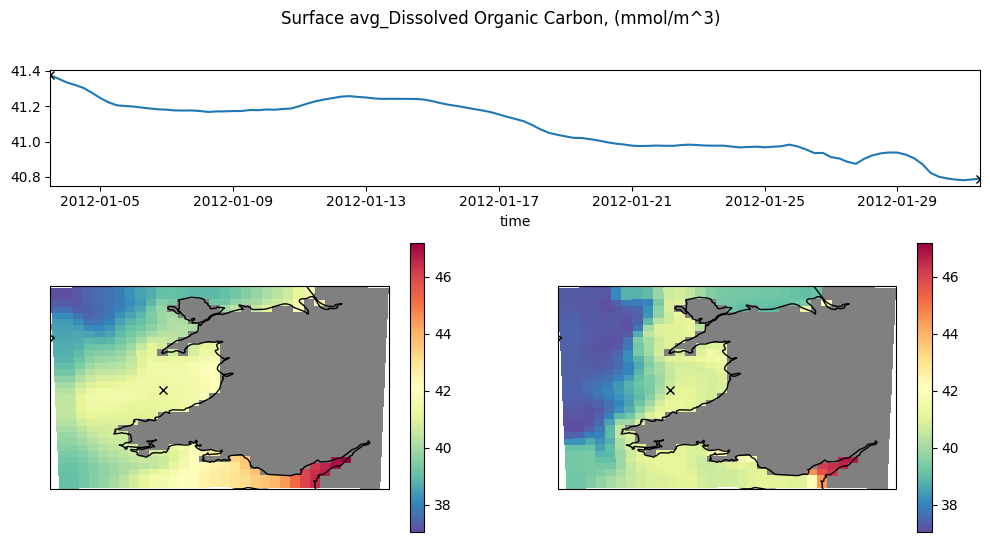

In [14]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import datetime as dt
import cartopy.feature as cfeature

bgc_ds = xr.open_dataset(restarted_simulation.directory / 'output/ROMS_MARBL_bgc.20120103120000.nc') # this contains 6-hourly data, with the date in the filename reflecting the first time entry
grd_ds = xr.open_dataset(restarted_simulation.directory / 'ROMS/input_datasets/roms_grd.nc')
lon,lat=grd_ds.lon_rho,grd_ds.lat_rho
output_time=[dt.datetime(2000,1,1)+dt.timedelta(seconds=t) for t in bgc_ds.ocean_time.values]

var = 'DOC'
i_idx = 10
j_idx = 15 
k_idx = 19
t_idx = [0,-1]

plot_data = bgc_ds[var].where(grd_ds.mask_rho).isel(s_rho=k_idx)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure()
cmap=plt.get_cmap('Spectral_r')
cmap.set_bad('grey')

gs = GridSpec(3, 2, figure=fig, hspace=0.5)

# time series
ax1 = fig.add_subplot(gs[0, :])

ax1.plot(output_time,plot_data[:,j_idx,i_idx])
ax1.set_xlim(output_time[0],output_time[-1])
ax1.set_xlabel('time')
ax1.plot(output_time[t_idx[0]],plot_data[t_idx[0],j_idx,i_idx],'kx')
ax1.plot(output_time[t_idx[-1]],plot_data[t_idx[-1],j_idx,i_idx],'kx')


# Maps
ax2 = fig.add_subplot(gs[1:, 0],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1:, 1],projection=ccrs.PlateCarree())

VMIN = np.min(plot_data.values[plot_data.values > 0])
VMAX = np.max(plot_data.values[plot_data.values > 0])

p2 = ax2.pcolormesh(lon,lat,plot_data.isel(time=0).values, vmin=VMIN, vmax=VMAX, cmap=cmap)
p3 = ax3.pcolormesh(lon,lat,plot_data.isel(time=-1).values, vmin=VMIN, vmax=VMAX, cmap=cmap)
[a.set_xticks([]) for a in [ax2, ax3]]
[a.set_yticks([]) for a in [ax2, ax3]]

ax2.set_title("")
ax2.plot(lon[j_idx,i_idx].values-360, lat[j_idx,i_idx].values, 'kx')
ax3.plot(lon[j_idx,i_idx].values-360, lat[j_idx,i_idx].values, 'kx')

[a.add_feature(cfeature.COASTLINE, linewidth=1) for a in [ax3,ax2]]
fig.colorbar(p2, ax=ax2)
fig.colorbar(p3, ax=ax3)

fig.suptitle(f'Surface {bgc_ds[var].long_name}, ({bgc_ds[var].units})')
fig.set_size_inches(12,6)
grd_ds.close()